### 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Statistics
from scipy import stats
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor

#Splitting data
from sklearn.model_selection import train_test_split

#One hot encoding
from sklearn.preprocessing import OneHotEncoder

#Parameters
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

### 2. Data Exploration

#### 2.1 dataset

In [2]:
#Upload dataset
student=pd.read_csv('student-mat.csv', sep=';')
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
#Shape
student.shape

(395, 33)

In [4]:
#Column information
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

-> There is no null data, each column has 395 rows!

In [5]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Attributes for both student-mat.csv (Math course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22/ mean:16.69)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (ordinal: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3-“ secondary education or 4 -“ higher education)

8 Fedu - father's education (ordinal: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3 -“ secondary education or 4 -“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')--> Why they classify jobs to these five?

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (nominal: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (nominal: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (nominal: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (ordinal: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (ordinal: from 1 - very low to 5 - very high)

26 goout - going out with friends (ordinal: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (ordinal: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (ordinal: from 1 - very low to 5 - very high)

29 health - current health status (ordinal: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

--> Among 33 features, there are 5 numeric; 28 categorical varaibles

#### 2.2 Exploring features
   

In [6]:
#Countplot
stu_col=student.columns
def get_countplot(columns):
    fig,axs=plt.subplots(nrows=11, ncols=3, figsize=(20,40))
    for column in list(enumerate(columns)):
        index=column[0]
        column_name=column[1]
        row=int(index/3)
        col=int(index%3)
        sns.countplot(x=column_name, data=student, ax=axs[row,col])  

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


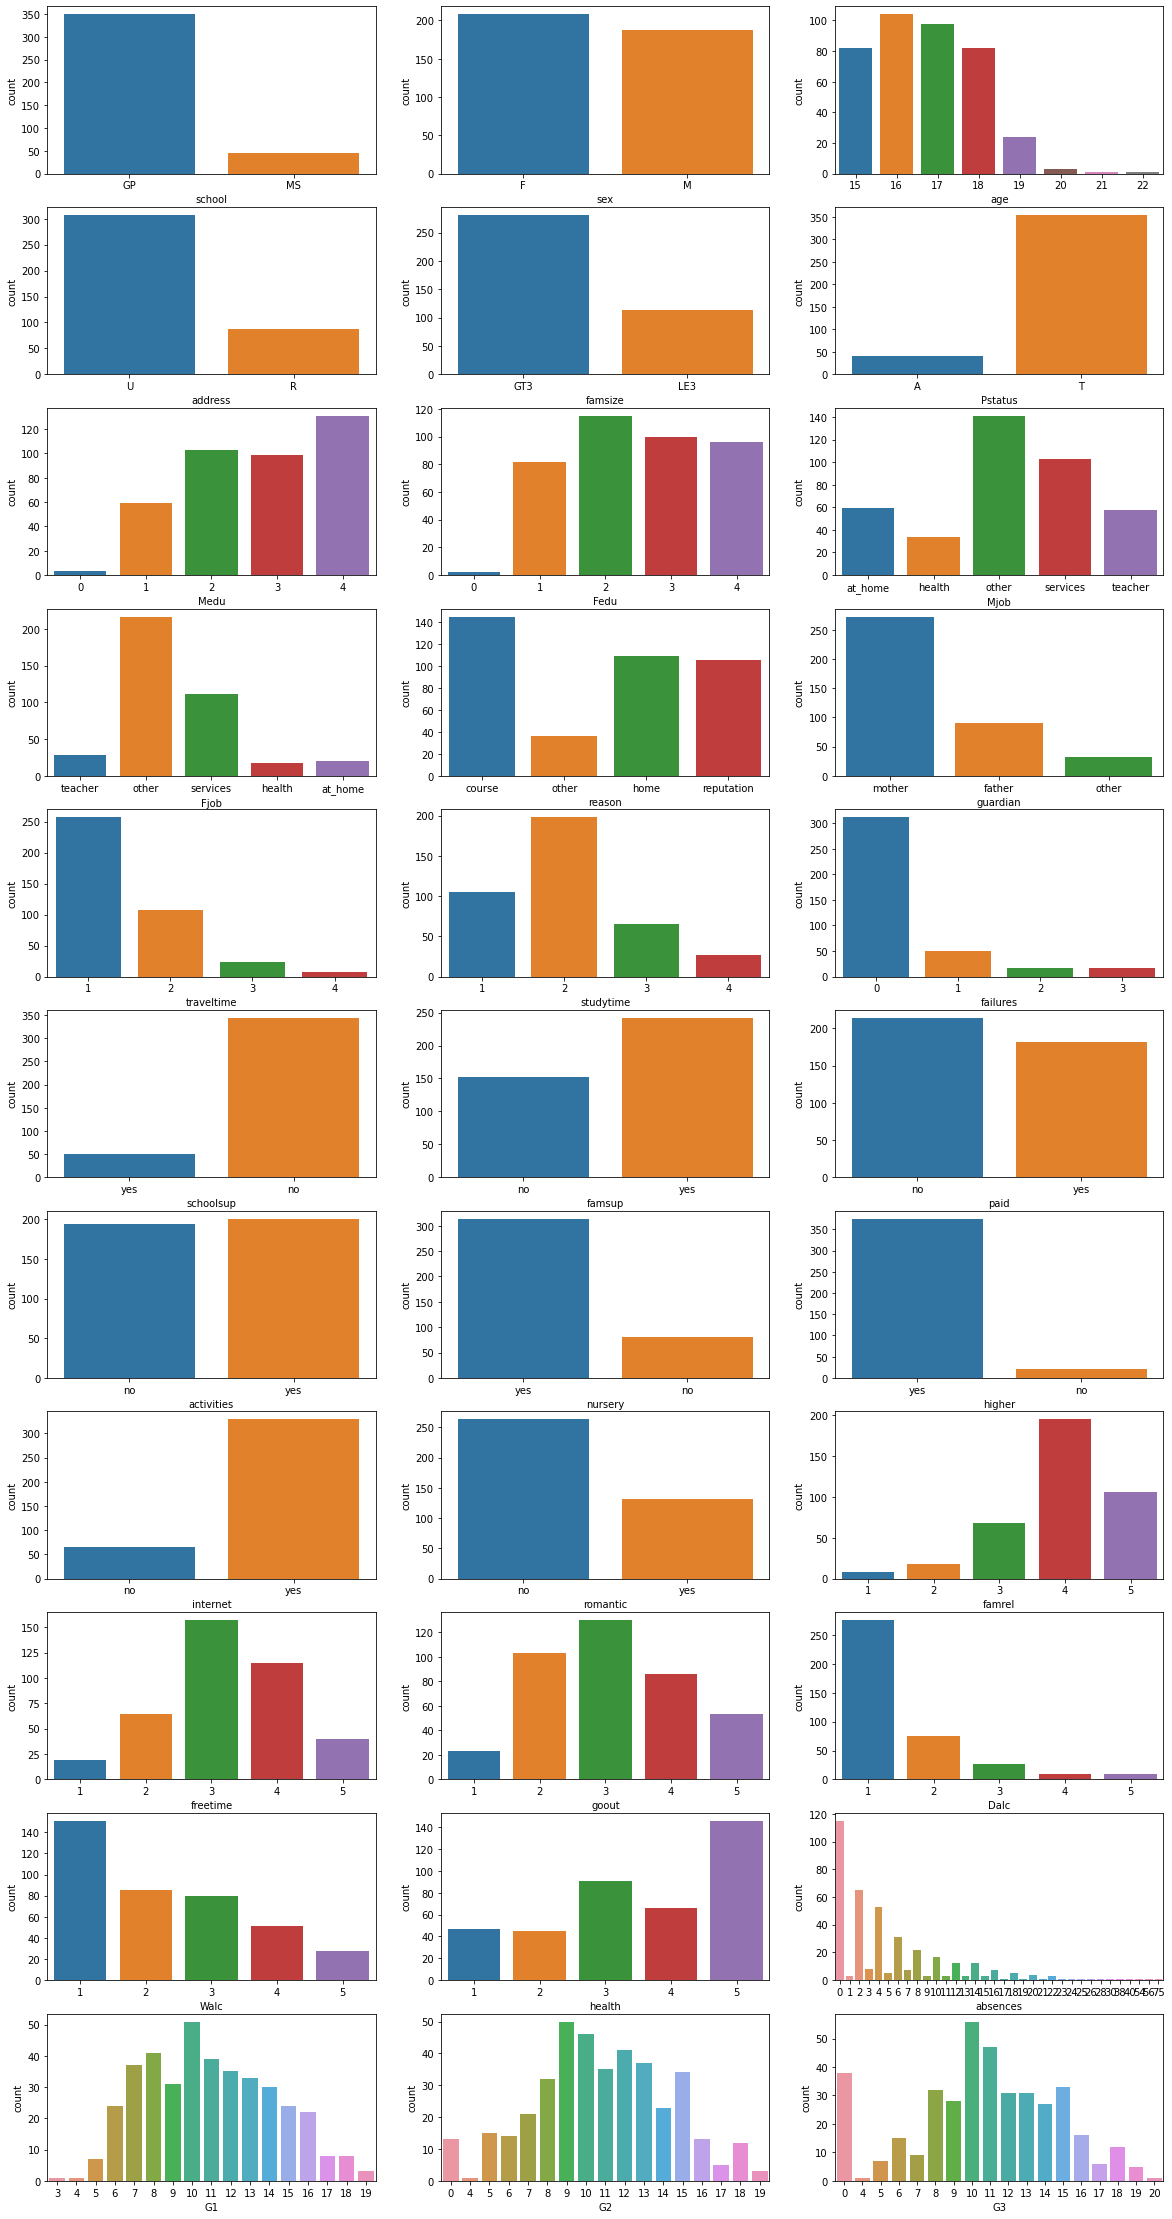

In [7]:
countplot=get_countplot(stu_col)
countplot

#### Findings
1. ['absences'] -> Even numbers significantly more than odd numbers. 
2. ['G3']-> 38 studnets get 0 points. 

##### 2.2.1 Target- G3

<AxesSubplot:xlabel='G3', ylabel='Count'>

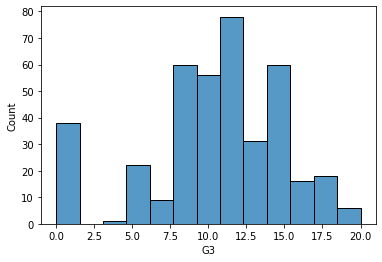

In [8]:
sns.histplot(data=student, x='G3')

###### 2.2.1.1. skew()

In [9]:
check_skew=skew(student['G3'])
print(check_skew)

-0.7298871128420806


--> The 'G3' data are roughly normally distributed.
A striking pattern is that there are noticeably many zeros. 

##### 2.2.2 student['G3']


In [10]:
g3_0_abs=student[(student['G3']==0) & (student['absences']>0)]
g3_0_abs

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


##### Findings
38 studnets get 0 points. None of them have ever been absent, which means that it is unlikely that they have received a zero point for an absence on test day. 

*my solution: If they got 10 or more points at least once in G1 or G2, it will be considered an outlier and will be deleted.

In [15]:
g3_outlier=[]
g3_0=student[student['G3']==0]
for index,row in g3_0.iterrows():
    if row['G2']>=10 or row['G1'] >=10:
        g3_outlier.append(index)

In [16]:
#Index of students with a G3 of 0 among students who scored at least 10 on the previous test
#They will be deleted during data preprocessing
print(g3_outlier)  

[130, 135, 136, 259, 264, 296, 334, 341]


##### 2.2.3 student['absences'] 

<AxesSubplot:xlabel='absences', ylabel='count'>

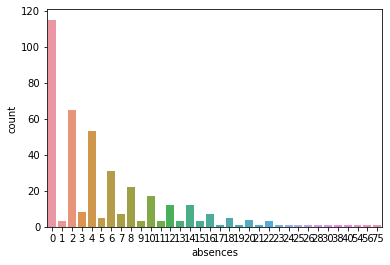

In [13]:
sns.countplot(x='absences', data=student)

--> Even numbers significantly more than odd numbers.

In [14]:
student[student['absences']==1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
262,GP,M,18,R,GT3,T,3,2,other,other,...,5,3,2,1,1,3,1,13,12,12
282,GP,F,18,R,LE3,T,1,1,at_home,other,...,5,2,2,1,1,3,1,12,12,12
323,GP,F,17,U,GT3,T,3,1,services,services,...,3,4,3,2,3,5,1,12,14,15


In [15]:
student[student['absences']==2]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,2,15,15,16
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,1,2,3,1,2,5,2,12,12,11
361,MS,M,18,R,LE3,T,1,1,at_home,other,...,4,4,3,2,3,5,2,13,12,12
375,MS,F,18,R,GT3,T,1,1,other,other,...,4,3,2,1,2,4,2,8,8,10
382,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,2,11,11,10


#### 2.3 Correlation coefficient
  This is also important because Regression presupposes independence between features.
  
  2.3.1 corr, heatmap
  
  2.3.2 VIF (if VIF >10, covariance exists)

##### 2.3.1 corr, heatmap

In [16]:
reg_col=['age', 'absences', 'G1', 'G2']
def get_regplot(columns):
    fig,axs=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    for column in list(enumerate(columns)):
        index=column[0]
        column_name=column[1]
        row=int(index/2)
        col=int(index%2)
        sns.regplot(x=column_name, y='G3',data=student, ax=axs[row,col])

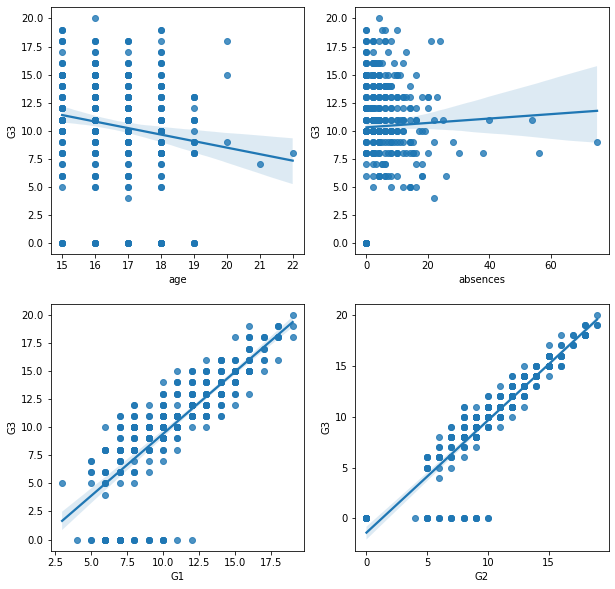

In [17]:
regplot=get_regplot(reg_col)
regplot

--> G1, G2 have positive linear relationships with G3 

In [18]:
corr_col=['G1', 'G2', 'G3']
corr=student[corr_col].corr(method='pearson')

In [19]:
corr

,G1,G2,G3
G1,1.000000,0.852118,0.801468
G2,0.852118,1.000000,0.904868
G3,0.801468,0.904868,1.000000


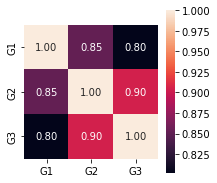

In [20]:
fig, ax = plt.subplots(figsize=(3,3))        
hm=sns.heatmap(corr.values, cbar=True, annot=True,  fmt='.2f', square=True,
              annot_kws={'size':10},yticklabels=corr_col,xticklabels=corr_col, ax=ax)

plt.show()

##### Findings
G1 and G2 have a high correlation with G3. 

* Solution
 1. Features with high correlation with the target feature (G3) can be removed.
 2. If many features are highly correlated, consider PCA (-> not this time)
 3. Consider using Lasso, Ridge

In [21]:
box_col=['age', 'absences', 'G1', 'G2', 'G3']
def get_boxplot(columns):
    fig,axs=plt.subplots(nrows=2, ncols=3, figsize=(10,8))
    for column in list(enumerate(columns)):
        index=column[0]
        column_name=column[1]
        row=int(index/3)
        col=int(index%3)
        sns.boxplot(data= student, x=column_name, ax=axs[row,col])

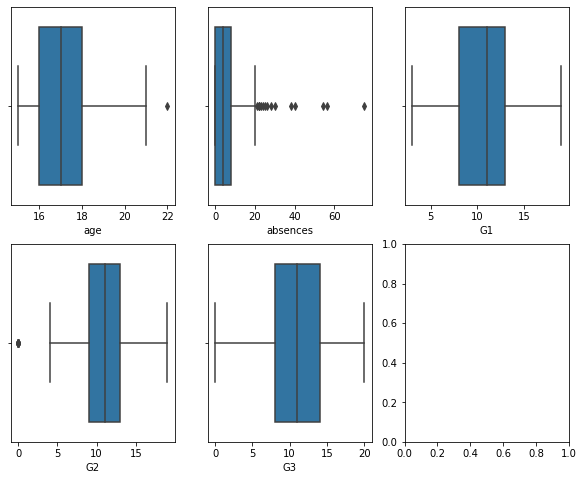

In [22]:
get_boxplot(box_col)

In [23]:
max(student['absences'])

75

In [24]:
student[student['absences']==75]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9


##### Findings
 -Instances with 75 absences should be considered for removal as this may affect outcomes

#### 2.5 T-test 

-Perform the T-test to determine whether the difference in average grades (G3) between the two groups is statistically significant.

-Null Hypothesis: The average grades between the two groups are the same

-Alternative Hypothesis: The average grades between the two groups are not the same

-Significance level: 5% test of significance will be used


##### 2.5.1. School-G3
A T-test determines whether the difference in mean grades (G3) between the two schools is statistically significant.

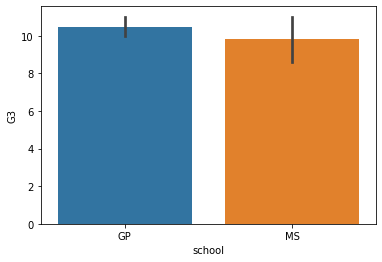

In [25]:
sns.barplot(x='school', y='G3', data=student)
plt.show()

In [39]:
gp_g3=student[student['school']=='GP']['G3']
ms_g3=student[student['school']=='MS']['G3']
tTestResultDiffVar=stats.ttest_ind(gp_g3, ms_g3, equal_var=False)
tTestResultDiffVar

Ttest_indResult(statistic=0.9555475253722291, pvalue=0.3431316933314036)

##### Findings
   P-value= 0.34, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis. 

##### 2.5.2. Sex-G3

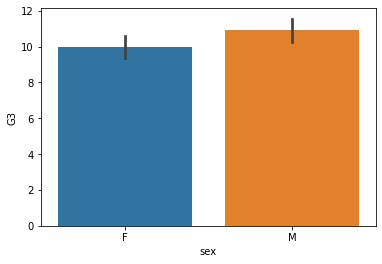

In [29]:
sns.barplot(x='sex', y='G3', data=student)
plt.show()

In [40]:
f_g3=student[student['sex']=='F']['G3']
m_g3=student[student['sex']=='M']['G3']
tTestResultDiffVar=stats.ttest_ind(f_g3, m_g3, equal_var=False) 
print(tTestResultDiffVar)

Ttest_indResult(statistic=-2.0650572003629564, pvalue=0.03957700303089975)


##### Findings
   P-value= 0.03, There is strong evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis. 

##### 2.5.3. Address-G3

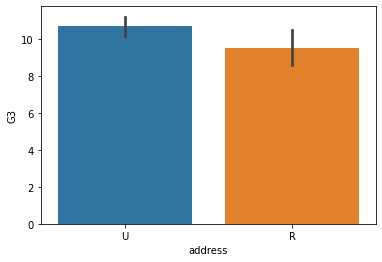

In [32]:
sns.barplot(x='address', y='G3', data=student)
plt.show()  #Urban/ Rural

In [41]:
urban_g3=student[student['address']=='U']['G3']
rural_g3=student[student['address']=='R']['G3']
tTestResultDiffVar=stats.ttest_ind(urban_g3, rural_g3, equal_var=False) 
print(tTestResultDiffVar)  

Ttest_indResult(statistic=2.1101367617785494, pvalue=0.03661381145664286)


##### Findings
P-value= 0.03, There is strong evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis.

##### 2.5.4. Family Size-G3

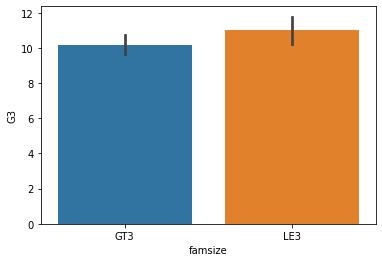

In [35]:
sns.barplot(x='famsize', y='G3', data=student)
plt.show()  #LE3-less or equal to 3, GT3- greater than 3

In [36]:
GT3_g3=student[student['famsize']=='GT3']['G3']
LE3_g3=student[student['famsize']=='LE3']['G3']
tTestResultDiffVar=stats.ttest_ind(GT3_g3, LE3_g3, equal_var=False) #모집단의 분산이 다르다는 가정
print(tTestResultDiffVar) 

Ttest_indResult(statistic=-1.6942894182883583, pvalue=0.09155470562414125)


##### Fidings
   P-value= 0.09, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis.

##### 2.5.5. P Status-G3

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

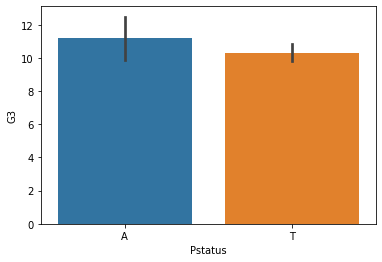

In [37]:
sns.barplot(x='Pstatus', y='G3', data=student)
plt.show()

In [38]:
a_g3=student[student['Pstatus']=='A']['G3']
t_g3=student[student['Pstatus']=='T']['G3']
tTestResultDiffVar=stats.ttest_ind(a_g3, t_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=1.2196750248412154, pvalue=0.22816469197603795)


##### Findings
   P-value= 0.23, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis.

##### 2.5.6. extra educational support-G3
schoolsup - extra educational support (binary: yes or no)

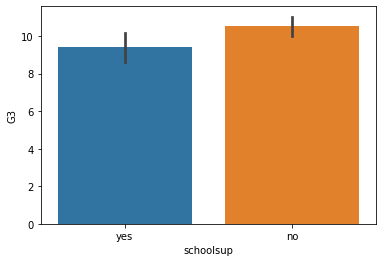

In [62]:
sns.barplot(x='schoolsup', y='G3', data=student)
plt.show()

In [42]:
y_g3=student[student['schoolsup']=='yes']['G3']
n_g3=student[student['schoolsup']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=-2.370454876019588, pvalue=0.019741513383964297)


##### Findings
P-value= 0.02, There is strong evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis.

##### 2.5.7 family educational  support-G3
 famsup - family educational support (binary: yes or no)

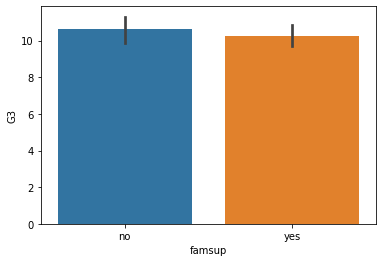

In [64]:
sns.barplot(x='famsup', y='G3', data=student)
plt.show()

In [43]:
y_g3=student[student['famsup']=='yes']['G3']
n_g3=student[student['famsup']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=-0.7735796788638442, pvalue=0.43975242586921437)


##### Findings
   P-value= 0.44, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis.

##### 2.5.8 extra paid classes-G3
paid - extra paid classes within the course subject (Math) (binary: yes or no)

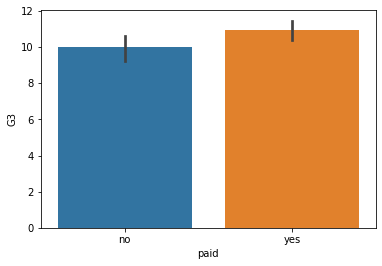

In [66]:
sns.barplot(x='paid',y='G3', data=student)
plt.show()

In [44]:
y_g3=student[student['paid']=='yes']['G3']
n_g3=student[student['paid']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=2.0830813622505953, pvalue=0.03790084419239711)


##### Findings
P-value= 0.04, There is some evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis.

##### 2.5.9 extra curricular activities-G3
activities - extra-curricular activities (binary: yes or no)

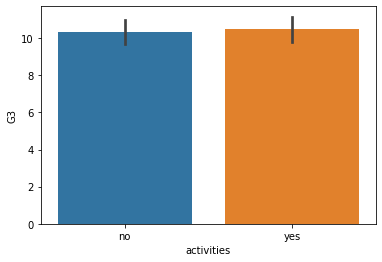

In [68]:
sns.barplot(x='activities',y='G3', data=student)
plt.show()

In [45]:
y_g3=student[student['activities']=='yes']['G3']
n_g3=student[student['activities']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=0.3194427846668576, pvalue=0.7495605129910023)


##### Findings
   P-value= 0.75, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis.


##### 2.5.10. nursery school-G3
nursery - attended nursery school (binary: yes or no)

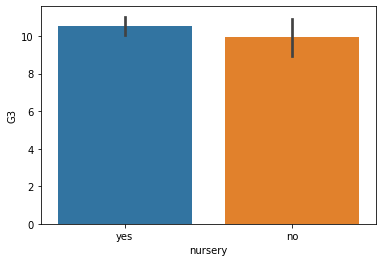

In [70]:
sns.barplot(x='nursery',y='G3', data=student)
plt.show()

In [46]:
y_g3=student[student['nursery']=='yes']['G3']
n_g3=student[student['nursery']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=1.0271053558051693, pvalue=0.30635403814971324)


##### Findings
   P-value= 0.31, There is not enough evidence to reject the null hypothesis. This significance test cannot reject the null hypothesis.


##### 2.5.11. willingness to take higher edu-G3
higher - wants to take higher education (binary: yes or no)

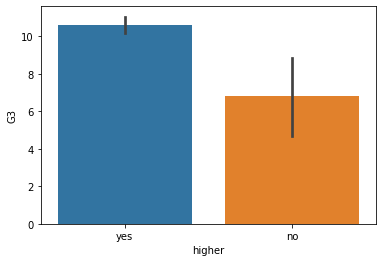

In [72]:
sns.barplot(x='higher',y='G3', data=student)
plt.show()

In [47]:
y_g3=student[student['higher']=='yes']['G3']
n_g3=student[student['higher']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=3.4473779245028155, pvalue=0.002440033985581924)


##### Findings
P-value= 0.002, There is strong evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis.


##### 2.5.12. Internet-G3
 internet - Internet access at home (binary: yes or no)

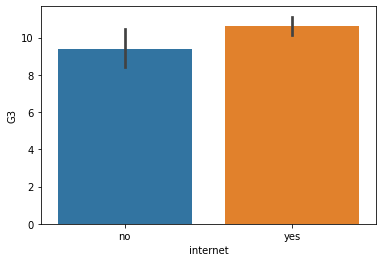

In [74]:
sns.barplot(x='internet',y='G3', data=student)
plt.show()

In [48]:
y_g3=student[student['internet']=='yes']['G3']
n_g3=student[student['internet']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=1.9894409453501107, pvalue=0.04955202216078457)


##### Findings
P-value= 0.05, There is some evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis. However, some people may not reject the null hypothesis with this result.


##### 2.5.13. romantic relationship-G3
romantic - with a romantic relationship (binary: yes or no)

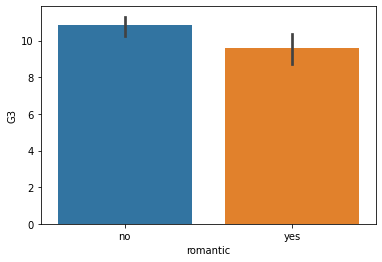

In [76]:
sns.barplot(x='romantic',y='G3', data=student)
plt.show()

In [49]:
y_g3=student[student['romantic']=='yes']['G3']
n_g3=student[student['romantic']=='no']['G3']
tTestResultDiffVar=stats.ttest_ind(y_g3, n_g3, equal_var=False) 
print(tTestResultDiffVar) 

Ttest_indResult(statistic=-2.5122003751250026, pvalue=0.01265517134333271)


##### Findings
P-value= 0.01, There is strong evidence against the null hypothesis. Therefore, this significant test can reject the null hypothesis.


#### Results of the t-test (5% significance test)
- The difference in average grades between the two groups is statistically significant at significance level 5%:

   [Sex, Address (Urban/Rural), Extra educational support, Extra paid activites, Willingness to take higher education, Internet,          Romantic relationship]
   

- The difference in average grades between the two groups is not statistically significant at significance level 5%:

   [School, Family size, Pstatus, Family educational support, Extra curricular class, Nursery school]

#### 2.6 ANOVA
Perform Levene's test and ANOVA to determine if differences in mean scores for groups within a feature are statistically significant.

-Null Hypothesis: The average grades between the groups are the same

-Alternative Hypothesis: The average grades between the groups are not the same

-Significance level: 5% test of significance will be used

##### 2.6.1. Age-G3

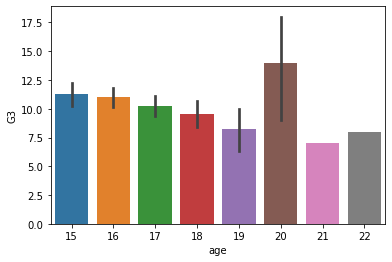

In [33]:
sns.barplot(x='age', y='G3', data=student)
plt.show()

In [51]:
five_g3=student[student['age']==15]['G3']
six_g3=student[student['age']==16]['G3']
seven_g3=student[student['age']==17]['G3']
eight_g3=student[student['age']==18]['G3']
nine_g3=student[student['age']==19]['G3']
zero_g3=student[student['age']==20]['G3']
one_g3=student[student['age']==21]['G3']
two_g3=student[student['age']==22]['G3']

In [52]:
stat, p = stats.levene(five_g3,six_g3,seven_g3,eight_g3,nine_g3,zero_g3,one_g3,two_g3)
print(p)

0.7407570882158565


In [53]:
stats.f_oneway(five_g3,six_g3,seven_g3,eight_g3,nine_g3,zero_g3,one_g3,two_g3)

F_onewayResult(statistic=2.323545773704226, pvalue=0.024801338949217662)

##### Findings
   P-value: 0.02/ The differences in mean grades are statistically significant between at least two groups.
   
##### Question
  Why is the grade of 20-year-olds exceptionally high? 

In [36]:
student[student['age']==20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
376,MS,F,20,U,GT3,T,4,2,health,other,...,5,4,3,1,1,3,4,15,14,15
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9


##### 2.6.2. Mother's education-G3

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3 -“ secondary education or 4 -“ higher education)

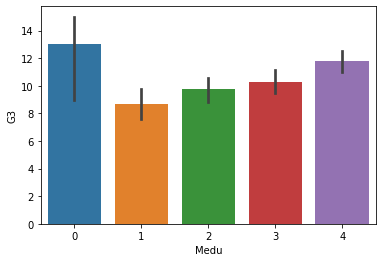

In [44]:
sns.barplot(x='Medu', y='G3', data=student)
plt.show()

In [60]:
stat, p = stats.levene(edu1_g3,edu2_g3,edu3_g3,edu4_g3)
print(p)

0.9115764646138421


In [61]:
edu1_g3=student[student['Medu']==1]['G3']
edu2_g3=student[student['Medu']==2]['G3']
edu3_g3=student[student['Medu']==3]['G3']
edu4_g3=student[student['Medu']==4]['G3']

stats.f_oneway(edu1_g3,edu2_g3,edu3_g3,edu4_g3)

F_onewayResult(statistic=7.764637445390311, pvalue=4.7757129583192325e-05)

##### Findings
   P-value < 0.0005/ The differences in mean grades are statistically significant between at least two groups

##### 2.6.3. Father's education-G3

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

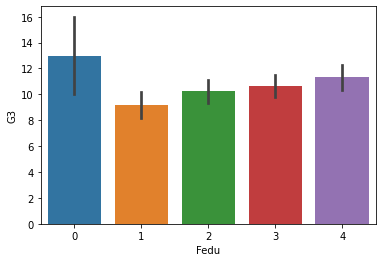

In [46]:
sns.barplot(x='Fedu', y='G3', data=student)
plt.show()

In [66]:
stat, p = stats.levene(edu1_g3,edu2_g3,edu3_g3,edu4_g3)
print(p)

0.7655693916534604


In [65]:
edu1_g3=student[student['Fedu']==1]['G3']
edu2_g3=student[student['Fedu']==2]['G3']
edu3_g3=student[student['Fedu']==3]['G3']
edu4_g3=student[student['Fedu']==4]['G3']

stats.f_oneway(edu1_g3,edu2_g3,edu3_g3,edu4_g3)

F_onewayResult(statistic=3.635515298951298, pvalue=0.013035488714246379)

##### Findings
   P-value=0.01/ The difference in mean grades is statistically significant between at least two groups

##### 2.6.4. Mother's Job-G3

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

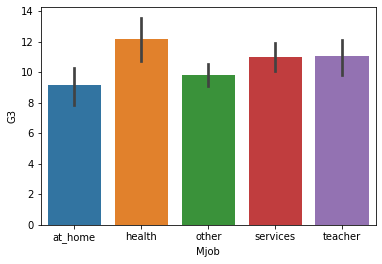

In [48]:
sns.barplot(x='Mjob', y='G3', data=student)
plt.show()

In [69]:
stat, p = stats.levene(home_g3,health_g3,other_g3,services_g3,teacher_g3)
print(p)

0.9437753301264346


In [70]:
home_g3=student[student['Mjob']=='at_home']['G3']
health_g3=student[student['Mjob']=='health']['G3']
other_g3=student[student['Mjob']=='other']['G3']
services_g3=student[student['Mjob']=='services']['G3']
teacher_g3=student[student['Mjob']=='teacher']['G3']

stats.f_oneway(home_g3,health_g3,other_g3,services_g3,teacher_g3)

F_onewayResult(statistic=3.7544596189013513, pvalue=0.005194749939407733)

##### Findings
P-value: 0.005/  The differences in mean grades are statistically significant between at least two groups.

##### 2.6.5. Father's Job-G3

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')-->Why they classify jobs to these five?

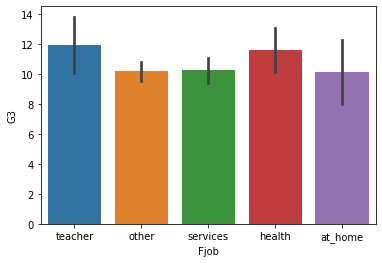

In [50]:
sns.barplot(x='Fjob', y='G3', data=student)
plt.show()

In [74]:
stat, p = stats.levene(home_g3,health_g3,other_g3,services_g3,teacher_g3)
print(p)

0.44132948635335056


In [73]:
home_g3=student[student['Fjob']=='at_home']['G3']
health_g3=student[student['Fjob']=='health']['G3']
other_g3=student[student['Fjob']=='other']['G3']
services_g3=student[student['Fjob']=='services']['G3']
teacher_g3=student[student['Fjob']=='teacher']['G3']

stats.f_oneway(home_g3,health_g3,other_g3,services_g3,teacher_g3)

F_onewayResult(statistic=1.3029154881291378, pvalue=0.2683141692179647)

##### Findings
P-value: 0.27/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.

##### 2.6.6. reason to choose this school-G3

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

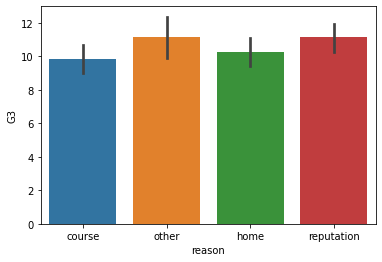

In [52]:
sns.barplot(x='reason', y='G3', data=student)
plt.show()

In [77]:
stat, p = stats.levene(course,other,home,repu)
print(p)

0.4709416983605361


In [76]:
course=student[student['reason']=='course']['G3']
other=student[student['reason']=='other']['G3']
home=student[student['reason']=='home']['G3']
repu=student[student['reason']=='reputation']['G3']


stats.f_oneway(course,other,home,repu)

F_onewayResult(statistic=2.0799920508343344, pvalue=0.10233745609730385)

##### Findings
P-value: 0.10/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.

##### 2.6.7. Guardian-G3
guardian - student's guardian (nominal: 'mother', 'father' or 'other')

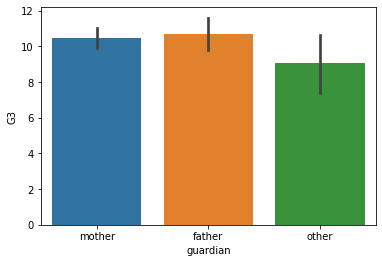

In [54]:
sns.barplot(x='guardian', y='G3', data=student)
plt.show()

In [79]:
stat, p = stats.levene(mo,fa,other)
print(p)

0.9231057825513399


In [78]:
mo=student[student['guardian']=='mother']['G3']
fa=student[student['guardian']=='father']['G3']
other=student[student['guardian']=='other']['G3']

stats.f_oneway(mo,fa,other)

F_onewayResult(statistic=1.5905172045230977, pvalue=0.2051326420058259)

##### Findings
P-value: 0.21/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.


##### 2.6.8. traveltime-G3
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

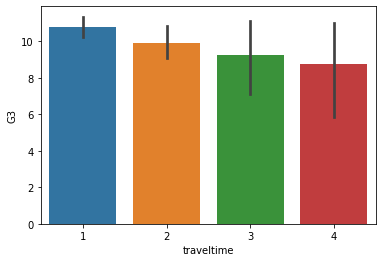

In [56]:
sns.barplot(x='traveltime', y='G3', data=student)
plt.show()

In [81]:
stat, p = stats.levene(one,two,three,four)
print(p)

0.758073625212522


In [82]:
one=student[student['traveltime']==1]['G3']
two=student[student['traveltime']==2]['G3']
three=student[student['traveltime']==3]['G3']
four=student[student['traveltime']==4]['G3']

stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.8397512190059848, pvalue=0.13937884626846256)

##### Findings
P-value: 0.14/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.


##### 2.6.9. studytime-G3
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

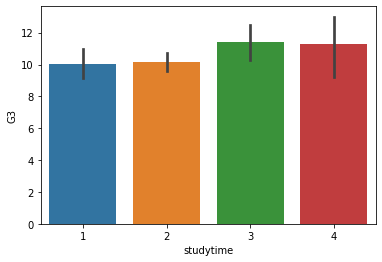

In [58]:
sns.barplot(x='studytime', y='G3', data=student)
plt.show()

In [84]:
stat, p = stats.levene(one,two,three,four)
print(p)

0.27701862882516815


In [83]:
one=student[student['studytime']==1]['G3']
two=student[student['studytime']==2]['G3']
three=student[student['studytime']==3]['G3']
four=student[student['studytime']==4]['G3']

stats.f_oneway(one,two,three,four)

F_onewayResult(statistic=1.7278351054436039, pvalue=0.1607228096836598)

##### Findings
P-value: 0.27/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.

--> I thought this was interesting. There were no differences in average grades according to study times 

##### 2.6.10 Failures-G3
failures - number of past class failures (numeric: n if 1<=n<3, else 4)

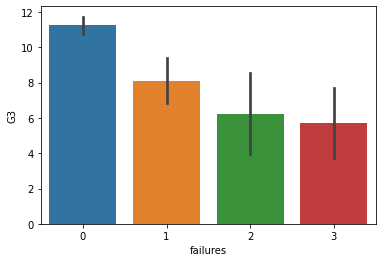

In [85]:
sns.barplot(x='failures', y='G3', data=student)
plt.show()

In [87]:
stat, p = stats.levene(zero, one,two,three)
print(p)

0.502292962573011


In [88]:
zero=student[student['failures']==0]['G3']
one=student[student['failures']==1]['G3']
two=student[student['failures']==2]['G3']
three=student[student['failures']==3]['G3']


stats.f_oneway(zero, one,two,three)

F_onewayResult(statistic=20.778270848358368, pvalue=1.6421656015988342e-12)

##### Findings
P-value< 0.005/  The differences in mean grades are statistically significant between at least two groups.


##### 2.6.11. Quality of family relationship-G3
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

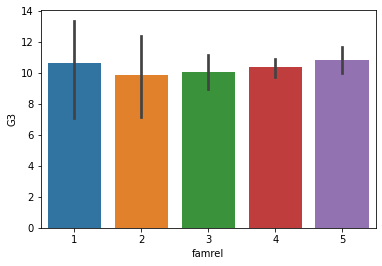

In [78]:
sns.barplot(x='famrel', y='G3', data=student)
plt.show()

In [90]:
stat, p = stats.levene(one,two,three, four, five)
print(p)

0.6752633481121397


In [91]:
one=student[student['famrel']==1]['G3']
two=student[student['famrel']==2]['G3']
three=student[student['famrel']==3]['G3']
four=student[student['famrel']==4]['G3']
five=student[student['famrel']==5]['G3']


stats.f_oneway(one,two,three, four, five)

F_onewayResult(statistic=0.3974329754209523, pvalue=0.8104874341858186)

##### Findings
P-value: 0.81/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.


##### 2.6.12. freetime-G3
freetime - free time after school (numeric: from 1 - very low to 5 - very high)

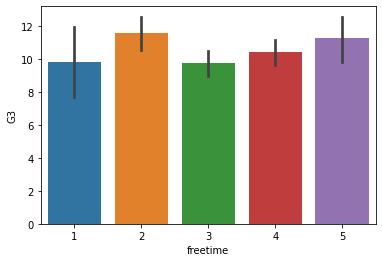

In [80]:
sns.barplot(x='freetime', y='G3', data=student)
plt.show()

In [94]:
stat, p = stats.levene(one,two,three, four, five)
print(p)

0.814501988573653


In [93]:
one=student[student['freetime']==1]['G3']
two=student[student['freetime']==2]['G3']
three=student[student['freetime']==3]['G3']
four=student[student['freetime']==4]['G3']
five=student[student['freetime']==5]['G3']


stats.f_oneway(one,two,three, four, five)

F_onewayResult(statistic=2.2245187381855573, pvalue=0.06574414402506515)

##### Findings
P-value: 0.07/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.

##### 2.6.13. going out with friends-G3
goout - going out with friends (numeric: from 1 - very low to 5 - very high)

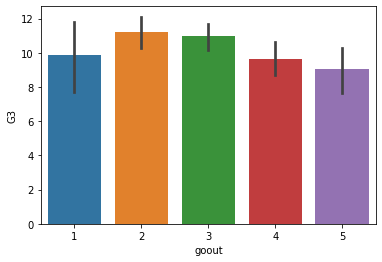

In [82]:
sns.barplot(x='goout', y='G3', data=student)
plt.show()

In [96]:
stat, p = stats.levene(one,two,three, four, five)
print(p)

0.6381076951690933


In [97]:
one=student[student['goout']==1]['G3']
two=student[student['goout']==2]['G3']
three=student[student['goout']==3]['G3']
four=student[student['goout']==4]['G3']
five=student[student['goout']==5]['G3']


stats.f_oneway(one,two,three, four, five)

F_onewayResult(statistic=3.1512156349464284, pvalue=0.014380078895198916)

##### Findings
P-value: 0.01/  The differences in mean grades are statistically significant between at least two groups.

##### 2.6.14. workday alcohol-G3
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

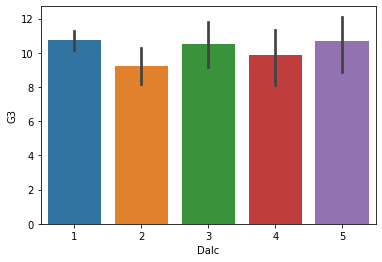

In [84]:
sns.barplot(x='Dalc', y='G3', data=student)
plt.show()

In [99]:
stat, p = stats.levene(one,two,three, four, five)
print(p)

0.12511604774019766


In [98]:
one=student[student['Dalc']==1]['G3']
two=student[student['Dalc']==2]['G3']
three=student[student['Dalc']==3]['G3']
four=student[student['Dalc']==4]['G3']
five=student[student['Dalc']==5]['G3']


stats.f_oneway(one,two,three, four, five)

F_onewayResult(statistic=1.5836045063367645, pvalue=0.17786362227119418)

##### Findings
P-value: 0.17/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.


###### Implications!
집단 간 유의한 차이가 없음

##### 2.6.15. health-G3
 health - current health status (numeric: from 1 - very bad to 5 - very good)

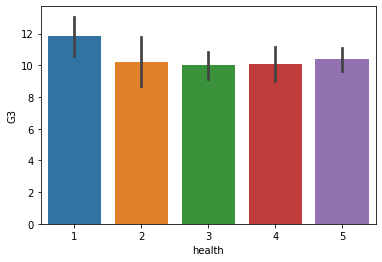

In [88]:
sns.barplot(x='health', y='G3', data=student)
plt.show()

In [115]:
stat, p = stats.levene(one,two,three, four, five)
print(p)

0.2817642124885496


In [114]:
one=student[student['health']==1]['G3']
two=student[student['health']==2]['G3']
three=student[student['health']==3]['G3']
four=student[student['health']==4]['G3']
five=student[student['health']==5]['G3']


stats.f_oneway(one,two,three, four, five)

F_onewayResult(statistic=1.4682836637827363, pvalue=0.21108482009233293)

##### Findings
P-value: 0.21/ There are weak evidences to reject the null hypothesis. Therefore, the differences in mean grades are not statistically significant.


##### 2.6.17. absences-G3
absences - number of school absences (numeric: from 0 to 93)

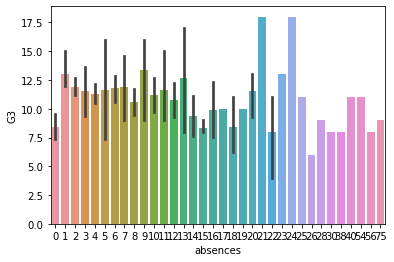

In [90]:
sns.barplot(x='absences', y='G3', data=student)
plt.show()

#### Results of ANOVA
-Differences in average grades between at least two groups are statistically significant:

[Age, Mother's education, Father's education, Mother's job, The number of failures, Going out with friends]

-Differences in average grades between at least two groups are not statistically significant:

[Father's job, Reasons to choose school, Guardian, Traveltime, Studytime, Quality of family relationship, Freetime]

### 3. Data Preprocessing

#### 3.1. Replacing the 0 values of 'Medu' and 'Fedu' with their respective mean

Compulsory education in Portugal lasts until the ninth grade.

Given that [Medu and Fedu]==1 is 4th grade and 2 is 5-9th grade, 0 is likely null data, not no education at all.

--> Therefore, I'll replace the zero value with the average value.

In [3]:
medu_index=student[student['Medu']==0].index
fedu_index=student[student['Fedu']==0].index

In [4]:
medu_mean=int(student['Medu'].mean())
fedu_mean=int(student['Fedu'].mean())

In [5]:
student.loc[medu_index, 'Medu']= medu_mean
student.loc[fedu_index,'Fedu']=fedu_mean

#### 3.2.  Highly correlated features
1. Mean Walc, Dalc -> Weekc 

2. Mean Medu, Fedu -> pedu

3. G1,G2 -> Ridge/ Lasso

##### 3.2.1. Walc, Dalc -> weekc
I'll create 'weekly alcohol' as the average of two features.

In [6]:
student['Walc'].value_counts()

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

In [7]:
student['Dalc'].value_counts()

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [8]:
student['weekc']=(student['Walc']+student['Dalc'])/2

In [9]:
student['weekc'].value_counts()

1.0    150
1.5     66
2.0     60
2.5     45
3.0     35
3.5     17
5.0      9
4.0      9
4.5      4
Name: weekc, dtype: int64

##### 3.2.2. Medu, Fedu->pedu (parents education)
I'll create 'pedu' as the average of two features.

In [10]:
student['Medu'].value_counts()

4    131
2    106
3     99
1     59
Name: Medu, dtype: int64

In [11]:
student['Fedu'].value_counts()

2    117
3    100
4     96
1     82
Name: Fedu, dtype: int64

In [12]:
student['pedu']=(student['Medu']+student['Fedu'])/2

In [13]:
student['pedu'].value_counts()

2.0    73
4.0    70
3.0    65
3.5    58
2.5    47
1.5    45
1.0    37
Name: pedu, dtype: int64

#### 3.3 Outlier detection
1. 'absences'==75: Remove this

2. 'G3' =0 : The number of absences for students with a G3 score of 0 is also 0. Therefore, it seems that factors other than absence make G3 0. Only students who got at least 10 in the previous exams but scored 0 in G3 are considered invalid data, which will be removed.

In [18]:
g3_outlier

[130, 135, 136, 259, 264, 296, 334, 341]

In [19]:
absences_outlier=student[student['absences']==75].index
print(absences_outlier)

Int64Index([276], dtype='int64')


In [20]:
df=student.copy()

In [21]:
drop_index=[130, 135, 136, 259, 264, 276, 296, 334, 341]
df.drop(drop_index, axis=0, inplace=True)

In [22]:
df.shape

(386, 35)

#### 3.4 Remove features
1. Medu,Fedu
2. Walc,Dalc

In [23]:
df.drop(['Medu', 'Fedu', 'Walc', 'Dalc'], axis=1, inplace=True)

#### 3.5. One-hot Encoding


In [24]:
df_test=df.copy()
df=pd.get_dummies(df)

In [25]:
df.shape

(386, 57)

In [26]:
df.head(3)

,age,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,2,2,0,4,3,4,3,6,5,...,1,0,0,1,0,1,1,0,1,0
1,17,1,2,0,5,3,3,3,4,5,...,1,0,1,0,0,1,0,1,1,0
2,15,1,2,3,4,3,2,3,10,7,...,1,0,0,1,0,1,0,1,1,0


### 4. Model
#### 4.1. Linear Regression
##### 4.1.1. Model &Evaluation

In [27]:
X=df.drop(['G3'],axis=1, inplace=False)
y=df['G3']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)

In [28]:
lr=LinearRegression()
lr.fit(X_train, y_train)
lr_preds=lr.predict(X_test)
lr_mse=mean_squared_error(y_test,lr_preds)
lr_rmse=np.sqrt(lr_mse)
lr_r2_score=r2_score(y_test, lr_preds)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(lr_mse,lr_rmse))
print("R2 score: {0:.3f}".format(lr_r2_score))

MSE: 3.701, RMSE: 1.924
R2 score: 0.814


In [29]:
def get_coef(model, n=5):
    coef=pd.Series(model.coef_, index=X.columns)
    coef_high=coef.sort_values(ascending=False).head(n)
    coef_low=coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

def visualize_coef(model):
    coef_high, coef_low=get_coef(model)
    coef_concat=pd.concat([coef_high, coef_low])
    sns.barplot(x=coef_concat.values, y=coef_concat.index)

##### 4.1.2. Visualize coef

Text(0.5, 1.0, 'Linear Regression Feature Importances')

findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Hancom Gothic Regular'] not found. Falling back to DejaVu Sans.


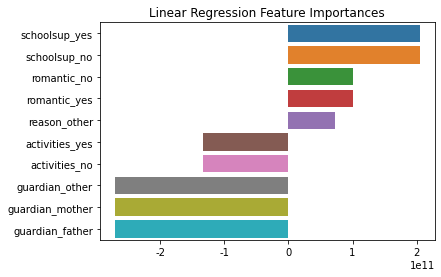

In [30]:
visualize_coef(lr)
plt.title('Linear Regression Feature Importances')

##### 4.1.3. Comparison of actual and predicted values

Out of 97 results, I'll randomly select 30 instances to visualize comparisons.

In [31]:
def get_df(y_test, preds):
    df=pd.DataFrame()
    df['Actual_score']=y_test
    df['Predict_score']=preds
    df['student_id']=df.index.tolist()
    df=df[df['Actual_score']>0]
    df_20=df.sample(25,random_state=4)
    df_20=df_20.sort_values(by='Actual_score',ascending=False)
    return df_20

def final_visual(y_test, preds):
    df_20=get_df(y_test,preds)
    df_20.plot(x='student_id', y= ['Actual_score','Predict_score'], kind="bar")
    plt.title('Comparision between Actual score and Predicted score')
    plt.show()    

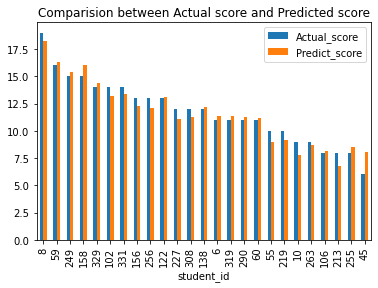

In [32]:
final_visual(y_test, lr_preds)

#### 4.2. Ridge
Since G1 and G2 have a very high correlation with G3, I'll perform Ridge regression to reduce their influence.

##### 4.2.1. GridSearchCV (alpha)

In [33]:

def get_best_params(model, params):
    grid_model=GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X,y)
    rmse=np.sqrt(-1*grid_model.best_score_)
    estimator=grid_model.best_estimator_
    print(f"{model.__class__.__name__}  rmse:{rmse}  Best parameter:{grid_model.best_params_}")
    

In [34]:
ridge=Ridge()
ridge_params={'alpha':[i for i in range(0,250)]}
get_best_params(ridge,ridge_params )

Ridge  rmse:1.7182739025206086  Best parameter:{'alpha': 202}


##### 4.2.2. Visualization -Changes in RMSE according to changes in alpha

In [35]:

def get_plot_xy(model, X, y, params):
    x_values=[]
    y_values=[]
    for param in params:
        if model=='Lasso':
            model=Lasso(param)
        elif model=='Ridge':
            model=Ridge(param)
    for param in params:
        model=Ridge(param)
        neg_mse_scores=cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        x_values.append(param)
        y_values.append(avg_rmse)
    
    return x_values, y_values 
        
def get_alpha_plot(model, X,y, params):
    values=get_plot_xy(model, X,y,params)
    plt.plot(values[0], values[1])
    plt.xlabel('alpha')
    plt.ylabel('rmse')
    plt.xticks(ticks=params)
    plt.show()   

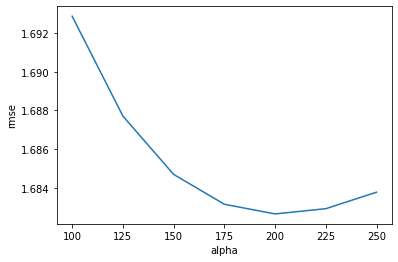

In [36]:
get_alpha_plot('Ridge', X,y, [ 100, 125, 150, 175, 200, 225, 250])

##### Finding: 
The RMSE is the lowest near the alpha  of 200 (alpha:202)

##### 4.2.3. Visualize coeff

In [37]:
ridge=Ridge(alpha=202)
ridge.fit(X,y)

Ridge(alpha=202)

Text(0.5, 1.0, 'Ridge Feature Importances')

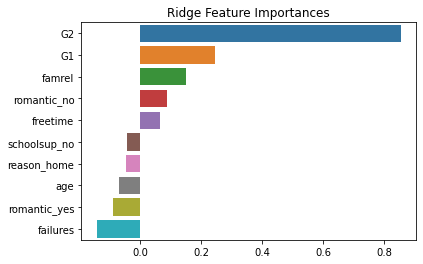

In [38]:
visualize_coef(ridge)
plt.title('Ridge Feature Importances')

##### 4.2.4. Comparison of actual and predicted values

In [39]:
ridge_preds=ridge.predict(X_test)

In [40]:
ridge.fit(X,y)
ridge.score(X, y, sample_weight=None)

0.8649332978578681

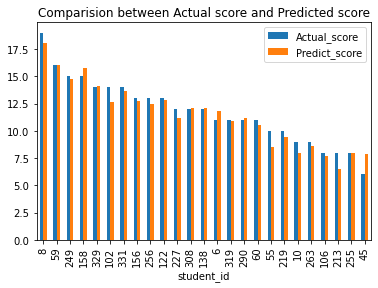

In [41]:
final_visual(y_test, ridge_preds)

##### 4.2.5. Results of Ridge Regression

1. Best parameter: alpha:202
2. Best RMSE Score: 1.718273902520609
3. R2 Score: 0.87

#### 4.3. Lasso


##### 4.3.1. GridSearchCV (alpha)

In [42]:
lasso=Lasso()
lasso_params={'alpha':[0.05,0.07,0.09,1.0]}
get_best_params(lasso, lasso_params)

Lasso  rmse:1.6883413000099774  Best parameter:{'alpha': 0.09}


##### 4.3.2. Visualization - Changes in RMSE according to changes in alpha

In [43]:

def get_plot_xy(model, X, y, params):
    x_values=[]
    y_values=[]
    for param in params:
        if model=='Lasso':
            model=Lasso(param)
        elif model=='Ridge':
            model=Ridge(param)
    for param in params:
        model=Lasso(param)
        neg_mse_scores=cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        x_values.append(param)
        y_values.append(avg_rmse)
    
    return x_values, y_values 
        
def get_alpha_plot(model, X,y, params):
    values=get_plot_xy(model, X,y,params)
    plt.plot(values[0], values[1])
    plt.xlabel('alpha')
    plt.ylabel('rmse')
    plt.xticks(ticks=params)
    plt.show()   

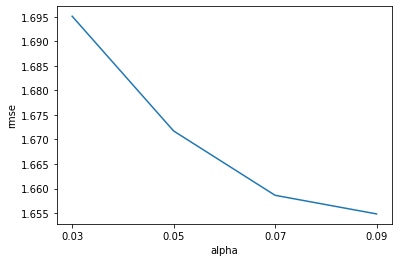

In [44]:
get_alpha_plot('Lasso', X,y, [0.03,0.05,0.07,0.09])

##### 4.3.3. Visualize coeff

Text(0.5, 1.0, 'Lasso Feature Importances')

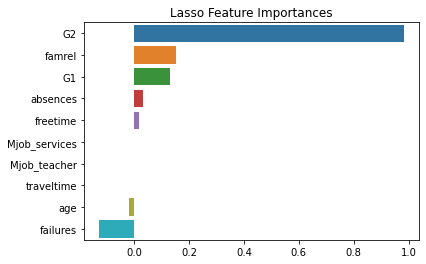

In [45]:
lasso=Lasso(alpha=0.09)
lasso.fit(X,y)
visualize_coef(lasso)
plt.title('Lasso Feature Importances')

##### 4.3.4. Comparison between actual and predicted values

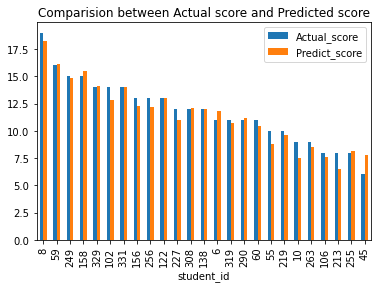

In [46]:
lasso_preds=lasso.predict(X_test)
final_visual(y_test, lasso_preds)

In [47]:
lasso.fit(X,y)
lasso.score(X,y)

0.8630040693811338

##### 4.3.5. Results of Lasso

1. Best parameter: alpha: 0.09
2. Best RMSE Score: 1.6883413000099774
3. R2 Score: 0.86

#### 4.4. XGBoost

##### 4.4.1. GridSearchCV

In [48]:
xgb_reg=XGBRegressor()
xgb_params={ 'max_depth': [3, 5, 7],
           'n_estimators': [100, 500, 1000],
           'min_child_weight': [3, 5, 7],
           'gamma': [0.3, 0.5, 0.7],
           'learning_rate':[0.01,0.05,0.1,0.2]}

-XGBRegressor  rmse:1.6380086885696814

-Best parameter:{'gamma': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 500}

In [49]:
xgb_reg=XGBRegressor(gamma= 0.7, learning_rate= 0.01, max_depth= 3, min_child_weight= 7, n_estimators= 500)
xgb_reg.fit(X_train, y_train)
xgb_preds=xgb_reg.predict(X_test)

In [50]:
xgb_reg.feature_importances_

array([0.00443482, 0.00853207, 0.01044269, 0.02200542, 0.0121453 ,
       0.03981328, 0.00798234, 0.01169309, 0.15170537, 0.04034913,
       0.42033702, 0.00578649, 0.0066601 , 0.00367389, 0.        ,
       0.01112498, 0.        , 0.00507975, 0.        , 0.0219933 ,
       0.        , 0.        , 0.        , 0.00845881, 0.00327161,
       0.00750974, 0.00965655, 0.        , 0.0096316 , 0.        ,
       0.01116068, 0.0152304 , 0.00247739, 0.0082447 , 0.01834915,
       0.        , 0.00725158, 0.01738289, 0.00838493, 0.00660792,
       0.00639164, 0.        , 0.        , 0.        , 0.01119023,
       0.        , 0.00488102, 0.        , 0.04688591, 0.        ,
       0.        , 0.        , 0.00679544, 0.        , 0.00647878,
       0.        ], dtype=float32)

##### 4.4.2. Visualize coeff

Text(0.5, 1.0, 'XGBRegressor Feature Importances')

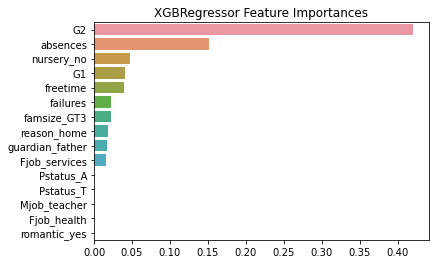

In [51]:
coef=pd.Series(data=xgb_reg.feature_importances_, index=X.columns)
coef_high=coef.sort_values(ascending=False).head(10)
coef_low=coef.sort_values(ascending=False).tail(5)  #회귀계수가 거의 0에 가까운,,

coef_concat=pd.concat([coef_high,coef_low])
sns.barplot(x=coef_concat.values, y=coef_concat.index)
plt.title('XGBRegressor Feature Importances')

##### 4.4.3. Comparison between the predicted and actual values

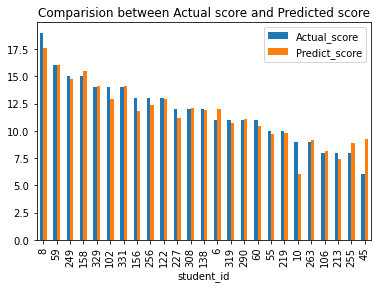

In [52]:
final_visual(y_test, xgb_preds)

##### 4.4.5. adding more hyperparameters

In [53]:
xgb_reg2=XGBRegressor(gamma= 0.7, learning_rate= 0.01, max_depth= 3, min_child_weight= 7, n_estimators= 500)
xgb_params2={ 'alpha':[0.05,1,2]}
get_best_params(xgb_reg2, xgb_params2)

XGBRegressor  rmse:1.6119767290571871  Best parameter:{'alpha': 2}


In [54]:
xgb_reg3=XGBRegressor(alpha=2,gamma= 0.7, learning_rate= 0.01, max_depth= 3, min_child_weight= 7, n_estimators= 500)
xgb_reg3.fit(X_train, y_train)
xgb_preds3=xgb_reg3.predict(X_test)

In [55]:
xgb_reg3.feature_importances_

array([0.00665982, 0.00790826, 0.00898402, 0.01854146, 0.0113187 ,
       0.04280498, 0.00391893, 0.01198999, 0.12293106, 0.06598648,
       0.4855401 , 0.00699383, 0.00593124, 0.        , 0.        ,
       0.        , 0.        , 0.00277674, 0.        , 0.01605129,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00267055, 0.01398433, 0.00951572, 0.00928186, 0.        ,
       0.01155094, 0.01369901, 0.        , 0.00245554, 0.01803827,
       0.        , 0.00643339, 0.00917559, 0.01710223, 0.01603108,
       0.00623952, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00700386, 0.        , 0.033263  , 0.        ,
       0.        , 0.        , 0.00521827, 0.        , 0.        ,
       0.        ], dtype=float32)

Text(0.5, 1.0, 'XGBRegressor Feature Importances')

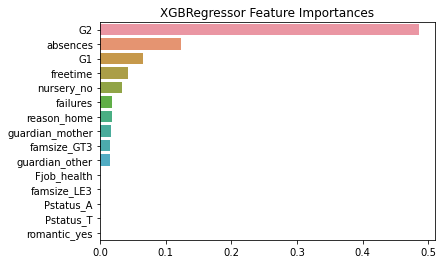

In [56]:
coef=pd.Series(data=xgb_reg3.feature_importances_, index=X.columns)
coef_high=coef.sort_values(ascending=False).head(10)
coef_low=coef.sort_values(ascending=False).tail(5)  

coef_concat=pd.concat([coef_high,coef_low])
sns.barplot(x=coef_concat.values, y=coef_concat.index)
plt.title('XGBRegressor Feature Importances')

The Lasso result was good before, so I added the alpha value to GB again.
The results appear to be better.

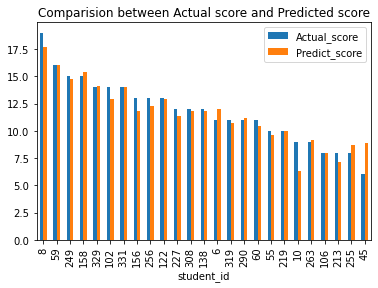

In [57]:
final_visual(y_test, xgb_preds3)

In [58]:
xgb_reg3.fit(X_train, y_train)
xgb_reg3.score(X_test, y_test)

0.8741856251124441

##### 4.4.5. Results of XGBoost
1. Best parameter: {'alpha'=2,'gamma': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 500}
2. Best RMSE Score: 1.6119767290571871
3. R2 Score: 0.87

### 5. Results
#### 5.1. RMSE Comparison

In [70]:
def get_final_score(models, X,y):
    final_score=pd.DataFrame()
    cnt=0
    for ml in models:
        if ml=='lr_f':
            model=LinearRegression()
        elif ml=='ridge_f':
            model=Ridge(alpha=202)
        elif ml=='lasso_f':
            model=Lasso(alpha= 0.09)
        elif ml=='xgb_f':
            model=XGBRegressor(alpha=2,gamma= 0.7, learning_rate= 0.01, max_depth= 3, min_child_weight= 7, n_estimators= 500)

        model.fit(X_train,y_train)
        preds=model.predict(X_test)
        mse=mean_squared_error(y_test,preds)
        rmse=np.sqrt(mse)
        final_rmse=np.round(rmse,3)
        
        final_score[model.__class__.__name__]=[final_rmse]
        
        cnt+=1

        if cnt==4:
            final_score.index=['RMSE']
            return final_score     
    

In [71]:
get_final_score(['lr_f','ridge_f', 'lasso_f', 'xgb_f'],X,y)


,LinearRegression,Ridge,Lasso,XGBRegressor
RMSE,1.924,1.801,1.805,1.582
